In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
titanic = sns.load_dataset(name="titanic")[["survived", "sex", "age", "embarked", "class"]]
titanic.head()

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
2,1,female,26.0,S,Third
3,1,female,35.0,S,First
4,0,male,35.0,S,Third


In [37]:
titanic.shape

(891, 5)

## Data Preprocessing 

In [38]:
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.head()

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
2,1,26.0,0,0,1,0,1
3,1,35.0,0,0,1,0,0
4,0,35.0,1,0,1,0,1


In [39]:
titanic.isnull().sum()

survived          0
age             177
sex_male          0
embarked_Q        0
embarked_S        0
class_Second      0
class_Third       0
dtype: int64

In [40]:
titanic = titanic.dropna()
titanic.shape

(714, 7)

## Decision Tree 

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_dt = DecisionTreeClassifier()

In [43]:
target = titanic['survived']
explanatory = titanic.drop(columns='survived')

In [44]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier()

In [45]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
        'class_Third'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x1d5ca44c500>}

## Predictions

In [50]:
model_dt.predict_proba(X=explanatory)[:5]

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [52]:
df_pred = titanic[['survived']].copy()


In [55]:
df_pred['pred_proba_dt'] = model_dt.predict_proba(X=explanatory)[:,1]
df_pred.tail(20)


,survived,pred_proba_dt
869,1,0.333333
870,0,0.111111
871,1,1.000000
872,0,0.000000
873,0,0.000000
874,1,1.000000
875,1,1.000000
876,0,0.100000
877,0,0.090909
879,1,1.000000


## Model visualization 

In [60]:
model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X=explanatory, y=target)


DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'class_Third <= 0.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]'),
 Text(0.75, 0.5, 'age <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]')]

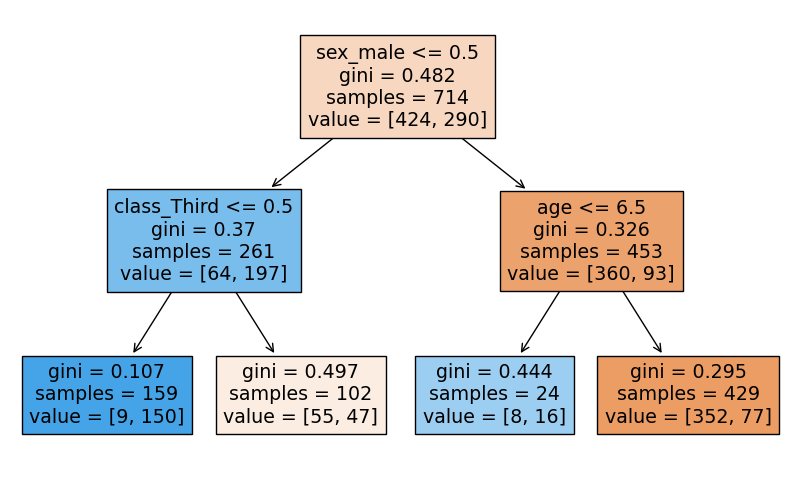

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names= explanatory.columns, filled=True)

## Confusion Matrix 

In [65]:
import numpy as np

df_pred['pred_dt'] = np.where(df_pred.pred_proba_dt > 0.5, 1, 0)
df_pred


,survived,pred_proba_dt,pred_dt
0,0,0.000000,0
1,1,1.000000,1
2,1,0.666667,1
3,1,1.000000,1
4,0,0.000000,0
...,...,...,...
885,0,0.000000,0
886,0,0.000000,0
887,1,1.000000,1
889,1,1.000000,1


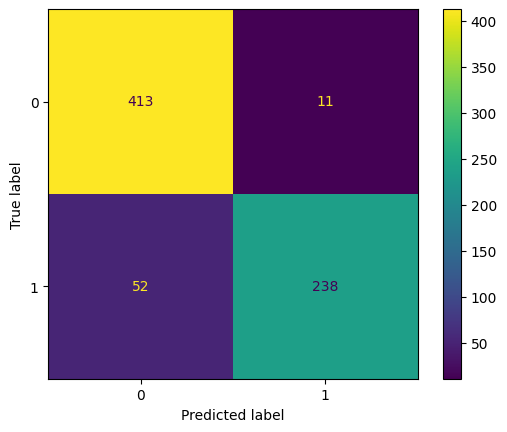

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

CM = ConfusionMatrixDisplay(cm)
CM.plot();


## Classification Report

In [70]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

print(report)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       424
           1       0.96      0.82      0.88       290

    accuracy                           0.91       714
   macro avg       0.92      0.90      0.91       714
weighted avg       0.92      0.91      0.91       714



## Roc Curve

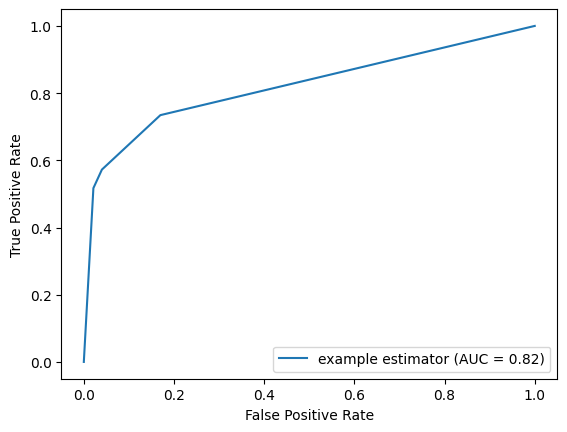

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

y = df_pred.survived
pred = model_dt.predict_proba(X=explanatory)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()


In [73]:
roc_auc

0.8205066688353937

## Randon Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model_rf = RandomForestClassifier()

In [76]:
model_rf.fit(X=explanatory, y =target)

RandomForestClassifier()

In [80]:
df_pred["pred_rf"] = model_rf.predict(X=explanatory)
df_pred.head()

,survived,pred_proba_dt,pred_dt,pred_rf
0,0,0.000000,0,0
1,1,1.000000,1,1
2,1,0.666667,1,1
3,1,1.000000,1,1
4,0,0.000000,0,0


In [82]:
model_rf.score(X=explanatory, y=target)

0.9117647058823529

## Support Vector Classifier

In [84]:
from sklearn.svm import SVC

In [85]:
model_sv = SVC()

In [87]:
model_sv.fit(X=explanatory, y=target)

SVC()

In [89]:
df_pred["pred_sv"]= model_sv.predict(X=explanatory)
df_pred.head()

,survived,pred_proba_dt,pred_dt,pred_rf,pred_sv
0,0,0.000000,0,0,0
1,1,1.000000,1,1,0
2,1,0.666667,1,1,0
3,1,1.000000,1,1,0
4,0,0.000000,0,0,0


In [91]:
model_sv.score(X=explanatory, y=target)

0.6190476190476191